In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Machine learning/Creating ML models/cars.csv')
data.head()


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
data.shape


(261, 8)

In [5]:
data=data.sample(frac=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 201 to 17
Data columns (total 8 columns):
mpg             261 non-null float64
 cylinders      261 non-null int64
 cubicinches    261 non-null object
 hp             261 non-null int64
 weightlbs      261 non-null object
 time-to-60     261 non-null int64
 year           261 non-null int64
 brand          261 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


In [8]:
data.columns=data.columns.str.lstrip()

In [9]:
data.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [10]:
data['cubicinches']=pd.to_numeric(data['cubicinches'],errors='coerce')
data['weightlbs']=pd.to_numeric(data['weightlbs'],errors='coerce')

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(256, 8)

In [13]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
data['brand']=labelEncoder.fit_transform(data['brand'].astype(str))
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
201,23.0,4,140.0,83,2639.0,17,1976,2
220,17.5,6,258.0,95,3193.0,18,1977,2
193,15.0,8,350.0,145,4082.0,13,1974,2
156,18.0,3,70.0,90,2124.0,14,1974,1
114,37.3,4,91.0,69,2130.0,15,1980,0


In [14]:
data_x=pd.DataFrame(data,columns=['mpg','cubicinches','cylinders','hp'])
label_y=data['brand']

Text(0, 0.5, 'Weight')

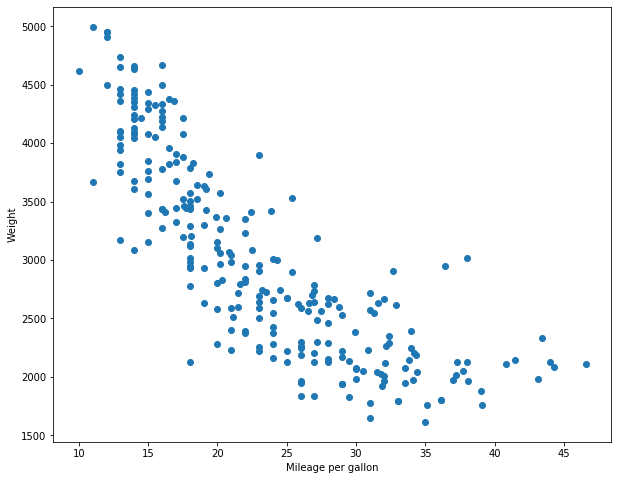

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(data['mpg'],data['weightlbs'])
plt.xlabel("Mileage per gallon")
plt.ylabel("Weight")

In [16]:
from sklearn.cluster import KMeans

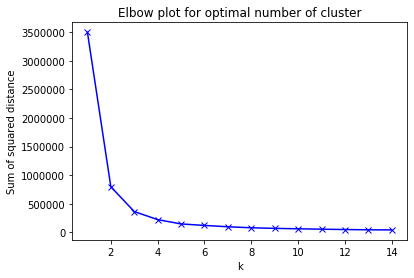

In [17]:
sum_of_squared_distance=[]
K=range(1,15)

for k in K:
    k_means=KMeans(n_clusters=k)
    k_means=k_means.fit(data_x)
    
    sum_of_squared_distance.append(k_means.inertia_)

plt.plot(K,sum_of_squared_distance,'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distance')

plt.title('Elbow plot for optimal number of cluster')
plt.show()

In [18]:
k_means=KMeans(n_clusters=3)
k_means=k_means.fit(data_x)
    


In [19]:
from sklearn.metrics import silhouette_score
score=silhouette_score(data_x,k_means.labels_)
print("score",score)

score 0.6323149311159748


In [20]:
from sklearn.metrics import homogeneity_score

hmg_score=homogeneity_score(label_y,k_means.labels_)
print("Homogeneity Score",hmg_score)

Homogeneity Score 0.31550036277564175


In [21]:
from sklearn.metrics import v_measure_score

vm_score=v_measure_score(label_y,k_means.labels_)
print("V measure Score",vm_score)

V measure Score 0.3003375614022765


In [23]:
from sklearn.metrics import completeness_score

comp_score=completeness_score(label_y,k_means.labels_)
print("Completness Score",comp_score)

Completness Score 0.28656536273532296


In [25]:
from sklearn.metrics import adjusted_rand_score

adj_r_score=adjusted_rand_score(label_y,k_means.labels_)
print("Adjusted rand Score",adj_r_score)

Adjusted rand Score 0.11281925794858025


In [26]:
from sklearn.metrics import adjusted_mutual_info_score

adj_mutual=adjusted_mutual_info_score(label_y,k_means.labels_,average_method='arithmetic')
print("Adjusted mutual Score",adj_mutual)

Adjusted mutual Score 0.2945981842532958
